<a href="https://colab.research.google.com/github/luciacasass/APRENDIZAJE_AUTOMATICO_23_24/blob/main/Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1. Diseño, Entrenamiento y Test de un Sistema de Redes de Neuronas Artificiales
## Aprendizaje Automático
Lucía Casas Sierra, Alba López Devesa, Paula Redondo Sastre

**Introducción...**

In [99]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x   # librería interna que ejecuta de forma eficiente los tensores; es el motor del sistema para hacer cálculo de multiplicaciones de matrices etc
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import utils
from keras.datasets import mnist  # 70k imágenes

print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
GPU Available: []
2.13.0


Cargamos el conjunto de datos Fashion-MNIST en Keras

In [100]:
# 2.- CARGAMOS EL CONJUNTO DE DATOS MINIST EN KERAS

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

Comprobación de la forma de los datos...

In [101]:
print(train_images.shape)

(60000, 28, 28)


**Construcción de la RNA**

...

In [102]:
from keras import models
from keras import layers

# Creación de la lista con las cadenas model1, model2, ..., model8 que servirán
# para nombrar cada uno de los distintos modelos de estudio
cadena = ['model'] * 8
for i in range(8):
  cadena[i] = cadena[i] + str(i+1)

cont = 0

# Construcción
for n in [10, 512]:
  for act in ['relu', 'sigmoid']:
    for opt in ['sgd', 'rmsprop']:
      cadena[cont] = vars()
      cadena[cont] = models.Sequential()

      cadena[cont].add(layers.Dense(n, activation=act, input_shape=(28*28,)))
      cadena[cont].add(layers.Dense(10, activation = 'softmax'))

      cadena[cont].compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
      cont += 1

**Resumen de cada uno de los diferentes modelos**

...

In [103]:
for i in range(8):
  print(f'\nResumen del modelo para los siguientes datos:\n{n} capas, función de activación {act}\n')
  cadena[i].summary()


Resumen del modelo para los siguientes datos:
512 capas, función de activación sigmoid

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 10)                7850      
                                                                 
 dense_129 (Dense)           (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Resumen del modelo para los siguientes datos:
512 capas, función de activación sigmoid

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 10)                7850      
                

**Preparación de los datos previa**

...

In [104]:
train_images = train_images.reshape((60000, 28 * 28))   # la neurona no acepta de entrada una matriz, sino un vector
print(train_images)
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[3000]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
60000
(60000, 784)
[[  0   0   0   0   0   0   0   0   1   1   0   0 120 131  91 147  30   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    3   0   0   0   0 251 199 172 195 152   0   0   0   0   3   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0  43 124 193 166 239
  255 216 172 228 126  61   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 167 155 159 171 178 211 215 210 196 189 158 164 159
  108   0   0   0   0   0   0   0   0   0   0   0   0  83 157 131 117 120 148 148 145 178 159 174 160 123 132 142 172  38   0   0   0   0   0
    0   0   0   0   0   0 159 128 118 120 122 112  93 124 161 109 128 128 129 146 138 167 122   0   0   0   0   0   0   0   0   0   0   0 171
  135 120 114 118 119 107 125 123 117 124 124 119 145 147 166 148   0   0   0   0   0   0   0   0   0   0   4 171 138 126 120 117 118 102 122
  145 111

In [105]:
train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[3000]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 60000,
 (60000, 784),
 array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.47, 0.51, 0.36, 0.58, 0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.98, 0.78, 0.67, 0.76, 0.6 , 0.  ,
        0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.49, 0.76, 0.65,
        0.94, 1.  , 0.85, 0.67, 0.89, 0.49, 0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.38,
        0.65, 0.61, 0.62, 0.67, 0.7 , 0.83, 0.84, 0.82, 0.77, 0.74, 0.62, 0.64, 0.62, 0.42, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0

In [106]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [107]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

**Entrenamiento de los sistemas**

...

In [108]:
for i in range(8):
  print(f'\nEntrenamiento de la red neuronal para el modelo {i+1}\n')
  cadena[i].fit(train_images, train_labels, epochs=5, batch_size=128)
  test_loss, test_acc = cadena[i].evaluate(test_images, test_labels)
  print('test_loss:', test_loss)
  print('test_acc:', test_acc)


Entrenamiento de la red neuronal para el modelo 1

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3510 - accuracy: 0.5722
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8058 - accuracy: 0.7336
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6846 - accuracy: 0.7692
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6234 - accuracy: 0.7892
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.5909 - accuracy: 0.7930
test_loss: 0.5908721089363098
test_acc: 0.7929999828338623

Entrenamiento de la red neuronal para el modelo 2

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.8058 - accuracy: 0.7387
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5177 - accuracy: 0.8251
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4699 - accuracy: 0.8382
Epoch 4/5
469/469 [==========================

**Interpretación de los casos 2 y 7 al incrementar las épocas de entrenamiento**

...

In [109]:
for i in [2, 7]:
  print(f'\nResultados para la red neuronal {i} con 25 épocas de entrenamiento\n')
  cadena[i-1].fit(train_images, train_labels, epochs=25, batch_size=128)


Resultados para la red neuronal 2 con 25 épocas de entrenamiento

Epoch 1/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4236 - accuracy: 0.8527
Epoch 2/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4169 - accuracy: 0.8550
Epoch 3/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4103 - accuracy: 0.8572
Epoch 4/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4051 - accuracy: 0.8582
Epoch 5/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4022 - accuracy: 0.8593
Epoch 6/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3978 - accuracy: 0.8619
Epoch 7/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3952 - accuracy: 0.8616
Epoch 8/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3932 - accuracy: 0.8629
Epoch 9/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3895 - accuracy: 0.8636
Epoch 10/25
469/469 [============

**Predicciones sobre la sexta imagen**

...

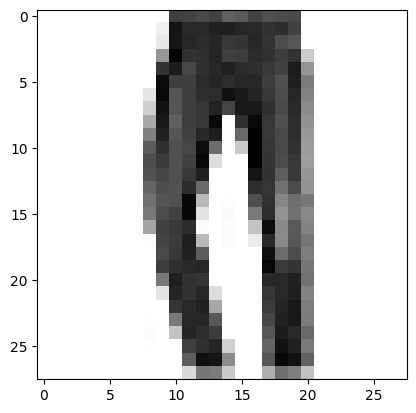

In [110]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [111]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

print(f"Etiqueta original que le corresponde a la imagen 6:\n{test_labels[5]}")

# Hacemos las predicciones con las imágenes de Test
for i in range(8):
  predictions = cadena[i].predict(test_images)

  print(f"\nRed neuronal número {i+1}\n")
  print("\n=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============\n")
  print(np.argmax(predictions[5]))
  print("=======================================================================")
  print("\n=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===\n")
  print(np.sum(predictions[5]))

Etiqueta original que le corresponde a la imagen 6:
1
313/313 [==============================] - 0s 1ms/step

Red neuronal número 1


=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 6)============

1

=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===

0.99999994
313/313 [==============================] - 0s 1ms/step

Red neuronal número 2


=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 6)============

1

=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===

0.99999994
313/313 [==============================] - 1s 2ms/step

Red neuronal número 3


=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 6)============

1

=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===

0.99999994
313/313 [==============================] - 1s 2ms/step

Red neuronal número 4


=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 6)============

1

=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===

1.000